 # Importing the Required Libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt #for visualisation
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("/home/sakshi/Downloads/cardataset/data.csv")
#Displaying top 5 rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Checking data
This is necessary to check which type of data are we dealing with like the data has null values or not whether the data is categorical whether string type of data is present ,checking duplicacy of data etc.

In [3]:
df.shape

(11914, 16)

In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
#checking null values
df.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
#checking datatype of each column
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


# Dropping Irrelevent columns

This step is important in EDA because sometimes there are some columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.From above we can see that Market Category has may null values i.e (3476) so we will directly drop this column and also column like Number of doors and Engine fuel type are not much related so we will also drop this two columns.


In [9]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [10]:
#after dropping
df.shape

(11914, 13)

# Renaming Columns
Sometimes names are not easily readable so this for improving redability of the dataset.

In [11]:
df.rename(columns = {'Engine HP':'HP', 'Engine Cylinders':'Cylinders', 
                              'Transmission Type':'Transmission','Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 
                     'city mpg': 'MPG-C', 'MSRP': 'Price'}, inplace = True) 

In [12]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


# Check for  null values and remove them
This step is important because if there are null values our output may not be correct.

In [13]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

Columns HP and Cylinders have null values so we will remove them

In [14]:
df.dropna(inplace=True,axis=0)
df.shape

(11816, 13)

In [15]:
#after removing null values
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

now we can see that there are no null values.


# Dropping Duplicates

This is often a good practice to do so  because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [16]:
x=df[df.duplicated(keep='first')]
x

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,22,15,481,29149


 From this we can see there are 792 duplicate rows so we will remove them

In [17]:
#dropping duplicates
data=df.drop_duplicates(keep='first')

In [18]:
data.shape

(11024, 13)

We can see the number of rows are reduced after dropping.

# Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. 

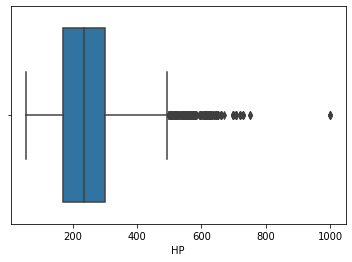

In [19]:
sns.boxplot(data['HP'])

In [20]:
data['HP'].describe()

count    11024.000000
mean       252.656477
std        109.992446
min         55.000000
25%        171.000000
50%        237.000000
75%        302.000000
max       1001.000000
Name: HP, dtype: float64

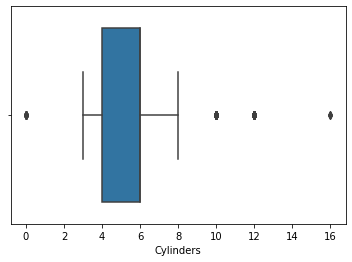

In [21]:
sns.boxplot(data['Cylinders'])

In [22]:
data['Cylinders'].describe()

count    11024.000000
mean         5.674438
std          1.763546
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Cylinders, dtype: float64

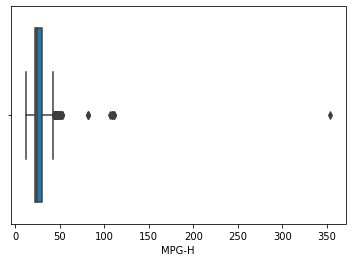

In [23]:
sns.boxplot(data['MPG-H'])

In [24]:
data['MPG-H'].describe()

count    11024.000000
mean        26.326560
std          7.473018
min         12.000000
25%         22.000000
50%         25.000000
75%         30.000000
max        354.000000
Name: MPG-H, dtype: float64

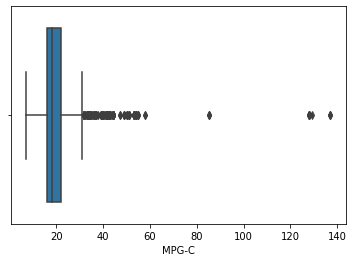

In [25]:
sns.boxplot(data['MPG-C'])

In [26]:
data['MPG-C'].describe()

count    11024.000000
mean        19.338534
std          6.608206
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max        137.000000
Name: MPG-C, dtype: float64

In [27]:
#outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [28]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8546, 13)

After removing outliers this is the final shape of our dataset

# Top Car Brands


In [29]:
carr=data['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['blue','red','yellow','green','brown']
labels= ['Chevrolet','Ford','Volkswagen','Toyota','Dodge']
sizes= ['1123','881','809','746','626']
explode=[0.1,0.1,0.1,0.1,0.1]
values=data['Make'].value_counts().head(5).to_frame()

/home/sakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


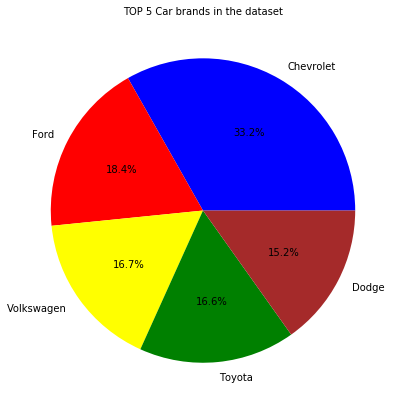

In [30]:
#Top 5 car brands
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()

Chevrolet, Ford, Volkswagen, Toyota and Dodge are the brands most present in our dataset.



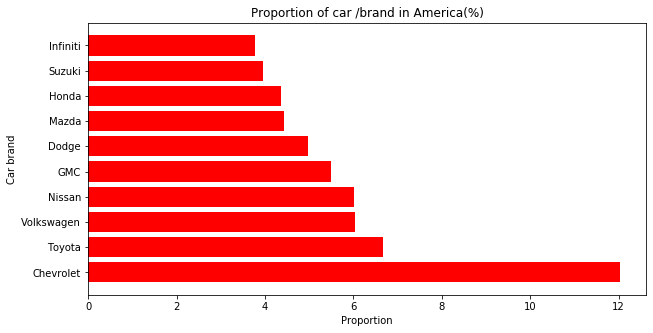

In [31]:
#Top 10 car brands
# Percentage of car per brand

counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())
popular_cars = counts.index[:10]

#plot
plt.figure(figsize=(10,5))
plt.barh(popular_cars, width=counts[:10],color='red')
plt.title('Proportion of car /brand in America(%)')
plt.xlabel('Proportion')
plt.ylabel('Car brand')
plt.show()

# Average price among top car brands

In [32]:
#avg price of top 10 car brands
avg_price = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(avg_price)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# Correlation matrix

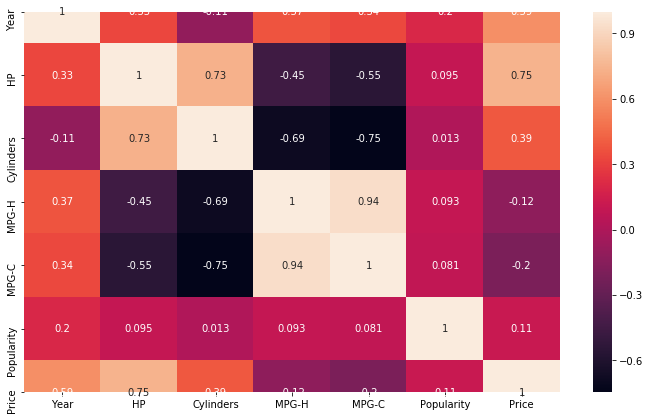

In [33]:
car_corr=data.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(car_corr,annot=True)
plt.show()

In [34]:
car_corr

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


# Highly correlated features are

1.MPG-H and MPG-C



2.HP and Cylinders


3.HP and Price

# High anticorrelation
1.Cylinders & MPG-H

2.Cylinders and MPG-C

Cylinders have a strong negative correlation with MPG-H and MPG-C because lower MPG figures mean higher fuel consumption.

# Scatter Plots(Visualisation)
We generally use scatter plots to find the correlation between two variables.

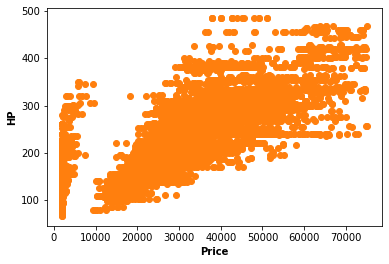

In [35]:
#scatter plot between Price and HP
plt.scatter(data['Price'],data['HP'],color='#ff7f0e' )
plt.xlabel('Price', weight='bold',fontsize=10)
plt.ylabel('HP', weight='bold', fontsize=10)
plt.show()

We can see that HP is highly correleated with Price. 

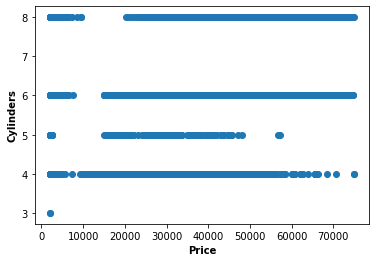

In [37]:
#scatter plot between Price and Cylinders

plt.scatter(data['Price'],data['Cylinders'])
plt.xlabel('Price', weight='bold',fontsize=10)
plt.ylabel('Cylinders', weight='bold', fontsize=10)
plt.show()

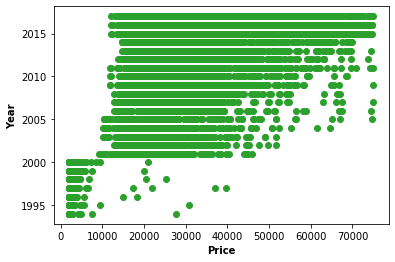

In [38]:
#scatter plot between Price and Year

plt.scatter(data['Price'],data['Year'],color='#2ca02c')
plt.xlabel('Price', weight='bold',fontsize=10)
plt.ylabel('Year', weight='bold', fontsize=10)
plt.show()

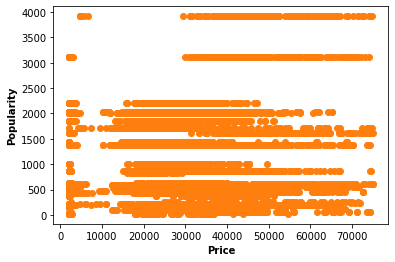

In [39]:
#scatter plot between Price and Popularity

plt.scatter(data['Price'],data['Popularity'],color='#ff7f0e')
plt.xlabel('Price', weight='bold',fontsize=10)
plt.ylabel('Popularity', weight='bold', fontsize=10)
plt.show()

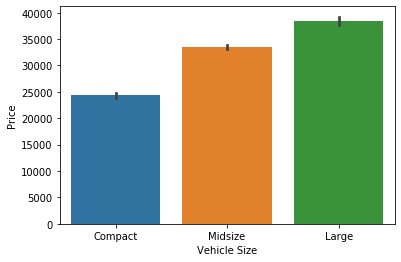

In [40]:
#Bar plot between Vehicle Size and Price
sns.barplot(x=data['Vehicle Size'], y=data['Price'])
plt.show()

# Label Encoder
This is necessary to convert categorical variables into numerical.

In [42]:
#import the library
from sklearn.preprocessing import LabelEncoder
#encoding the columns
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=LabelEncoder().fit_transform(data[column])
    

In [44]:
X = data[data.columns.difference(['Price'])]

In [45]:
#target 
Y=data['Price']


# Splitting the data 

In [53]:
#Splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

# Model Building

In [60]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# To find intercept
print(linear.intercept_)

-143.70703480739303


In [56]:
#To find slope
print(linear.coef_)

[-9.03099006e+01 -1.35316999e+02  1.26050717e+01 -2.71175240e+00
  1.65856132e+00 -5.92273355e+00 -2.45256665e-01 -1.08783383e+01
 -2.93909039e+02  4.89596701e+01 -9.62905865e+00  6.00642875e+01]


In [61]:
#Prediction
y_test_predict = linear.predict(X_test)

y_train_predict= linear.predict(X_train)


In [59]:
# Actual versus Predicted
de = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_predict})
de

,Actual,Predicted
6757,4219,2653.903881
1074,3275,2580.370627
7629,3223,3180.240174
11338,463,660.692498
8252,4390,3123.043382
...,...,...
1268,2176,2136.776638
2162,822,1083.140319
9232,3245,2677.365843
1523,4554,5062.970944


In [62]:
#metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("MSE of Train =", mean_squared_error(y_train,y_train_predict))
print('MSE of Test',mean_squared_error(y_test,y_test_predict) )
print('r2_score of Train ', r2_score(y_train,y_train_predict))
print('r2_score of Test ',r2_score(y_test,y_test_predict))
print('MAE of Train ',mean_absolute_error(y_train,y_train_predict) )
print('MAE of Test ',mean_absolute_error(y_test,y_test_predict))

MSE of Train = 446679.4284589303
MSE of Test 452693.57216826
r2_score of Train  0.7581870362777205
r2_score of Test  0.746174538788897
MAE of Train  523.60264091487
MAE of Test  523.7538122601278
